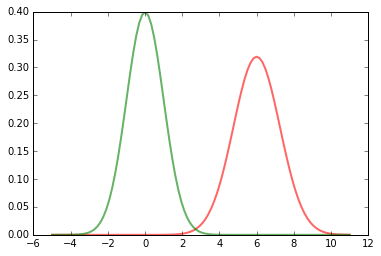

p(x) samples : [ 6.79137978  4.48367776  9.00068497  4.85861107  6.77497038]
q(x) samples : [-0.28670466 -1.27845059 -1.14628282  1.33688882 -0.05478779]
Entropy of P(x)   : +3.464382
DKL of P(x),Q(x) : +18.057248


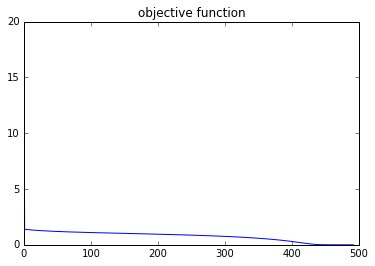

 491, +0.000009, +5.994762, +1.250326


In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats

h = 0.01     
epsilon = 1.e-5
alpha = 0.1     

x = np.linspace(-5,11,100)

P = norm(6,1.25)
mu, sigma = 0, 1.0

Q = norm(mu,sigma)

plt.plot(x,P.pdf(x), 'r-', lw=2, alpha=0.6, label='P pdf')
plt.plot(x,Q.pdf(x), 'g-', lw=2, alpha=0.6, label='Q pdf')
plt.show()

p = P.rvs(size=5)
q = Q.rvs(size=5)
print("p(x) samples : {}".format(p))
print("q(x) samples : {}".format(q))

print("Entropy of P(x)   : {:+f}".format(stats.entropy(P.pdf(x))))

# P,Q DKL
dkl = stats.entropy(P.pdf(x),Q.pdf(x))
print("DKL of P(x),Q(x) : {:+f}".format(dkl))
dkls = [dkl]

for i in range(1000):
    dmu = (stats.entropy(P.pdf(x),norm(mu+h,sigma).pdf(x)) - stats.entropy(P.pdf(x),norm(mu-h,sigma).pdf(x))) / (2*h)
    dsigma = (stats.entropy(P.pdf(x),norm(mu,sigma+h).pdf(x)) - stats.entropy(P.pdf(x),norm(mu,sigma-h).pdf(x))) / (2*h)

    mu -= alpha * dmu
    sigma -= alpha * dsigma

    Q = norm(mu,sigma)

    dkl = stats.entropy(P.pdf(x),Q.pdf(x))
    dkls.append(dkl)

    if dkl < epsilon:
        break


plt.plot(dkls)
plt.title("objective function")
plt.show()
print(" {}, {:+f}, {:+f}, {:+f}".format(i,dkl,mu,sigma))



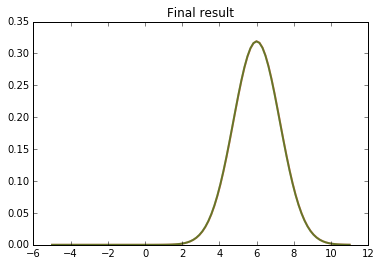

In [12]:
plt.plot(x, P.pdf(x), 'r-', lw=2, alpha=0.6, label='P pdf')
plt.plot(x, Q.pdf(x), 'g-', lw=2, alpha=0.6, label='Q pdf')
plt.title('Final result')
plt.show()


In [15]:
p = P.rvs(size=5)
q = Q.rvs(size=5)
print("{} /// {}".format(p,q))

[ 4.63128723  4.88340491  9.06918137  6.51640155  6.73809187] /// [ 6.27583002  6.80872033  7.93797453  4.25685623  6.72225065]
